# Importação de bibliotecas

In [1]:
# Importando as bibliotecas necessárias:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

# Carregamento dos dados

In [2]:
# nomeArq = 'TB_Limpo_demographics2';
nomeArq = 'Depression_demographics';

In [3]:
# Carregando a base de dados:
data = pd.read_csv('../Dataset (Limpo)/' + nomeArq + '.csv', encoding='ISO-8859-1', sep=';')
data2 = pd.read_csv('../Dataset (Limpo)/' + nomeArq + '.csv', encoding='ISO-8859-1', sep=';')# Backup
data3 = pd.read_csv('../Dataset (Limpo)/' + nomeArq + '.csv', encoding='ISO-8859-1', sep=';')# Backup

In [4]:
data.head()

,D1,D1A,D1B,D2,D9,D9A1,D9A2,D11,D12,D12A,...,spouse_lifetime_occupation,spouse_educ4,SEX,agecat_wmh,educat,marcat,emp,occ_LT4,occ_cur4,educ_cat4
0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,1.0,...,NaN,NaN,1,1,1.0,1,1,NaN,NaN,3
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,...,25.0,3.0,1,1,1.0,1,1,1.0,1.0,2
2,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,25.0,1.0,1,3,1.0,1,1,1.0,1.0,2
3,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,1.0,...,13.0,3.0,1,1,3.0,1,1,3.0,3.0,4
4,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,...,NaN,NaN,0,4,1.0,2,4,NaN,NaN,1


In [5]:
data.shape

(3390, 194)

# Identificação da variável diagnóstico

In [6]:
colRemove = ['mde_ond', 'dsm_mddh', 'dsm_mnd', 'dsm_mndh', 'd_mddh12', 'mnd_ond', 'd_mde12', 'd_mnd12', 'd_mndh12', 'd_mde30',	'd_mddh30',	'd_mnd30', 'd_mndh30'];

#Percorre o vetor removendo todos elementos pertencentes a ele
for coluna in colRemove:
    data.drop(coluna, inplace=True, axis=1)

In [7]:
varDiagnostico = 'dsm_mde';

In [8]:
data.fillna(0, inplace=True)

In [9]:
data.head()

,D1,D1A,D1B,D2,D9,D9A1,D9A2,D11,D12,D12A,...,spouse_lifetime_occupation,spouse_educ4,SEX,agecat_wmh,educat,marcat,emp,occ_LT4,occ_cur4,educ_cat4
0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,...,0.0,0.0,1,1,1.0,1,1,0.0,0.0,3
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,...,25.0,3.0,1,1,1.0,1,1,1.0,1.0,2
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,25.0,1.0,1,3,1.0,1,1,1.0,1.0,2
3,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,...,13.0,3.0,1,1,3.0,1,1,3.0,3.0,4
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.0,...,0.0,0.0,0,4,1.0,2,4,0.0,0.0,1


In [10]:
#Contador de cada instância classificada de acordo com a coluna de classificação
data[varDiagnostico].value_counts().to_dict()

{5: 2437, 1: 953}

In [11]:
data.shape

(3390, 181)

# Treinamento dos dados

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(varDiagnostico,axis=1),data[varDiagnostico],test_size=0.2)

In [13]:
# Verificando as formas dos dados:
X_train.shape, X_test.shape

((2712, 180), (678, 180))

# Execução da árvore de decisão

## Parâmetros do classificador DecisionTreeClassifier
- *criterion*: medida de qualidade da divisão, aqui que definimos qual dessas métricas (Indice Gini, Chi-Square, Information Gain ou a redução da variância) iremos usar.
- splitter: estratégia utilizada para dividir o nó de decisão.
- max_depth: profundidade máxima da árvore.
- min_samples_split: número de amostras mínimas para considerar um nó para divisão.
- min_samples_leaf: número de amostras mínimas no nível folha.

In [14]:
# Instânciando o objeto classificador:
clf = DecisionTreeClassifier(criterion='entropy')

In [15]:
clf = clf.fit(X_train,y_train)

In [16]:
# Verificando as features mais importantes para o modelo treinado:
# clf.feature_importances_

# O código acima retorna um array com o valor de cada variável:

In [17]:
# for feature,importancia in zip(data.columns,clf.feature_importances_):
#     print("{}:{}".format(feature, importancia))
# Saída:

In [18]:
ConjuntoFeatures =[]
ConjuntoImportancias = []

for feature,importancia in zip(data.columns,clf.feature_importances_):
    #print("{}:{}".format(feature, importancia))
    #Utilizado para armazenar os resultados em um arquivo
    if (importancia >0):
        ConjuntoFeatures.append(feature)
        ConjuntoImportancias.append(importancia)
# Saída:

In [19]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_test.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances.to_csv('TreeDecisionAtributos.txt')

In [20]:
#Gerar arquivo csv com os atributos selecionados e seus respectivos pesos

In [21]:
armazena_data = {'AtributoSelecionado': ConjuntoFeatures, 'Peso': ConjuntoImportancias}

In [22]:
conjSelecaoAtrib = pd.DataFrame(armazena_data)

In [23]:
conjSelecaoAtrib.shape

(60, 2)

In [24]:
conjSelecaoAtrib.head(30)

,AtributoSelecionado,Peso
0,D1A,0.002042
1,D16,0.003759
2,D22A,0.001773
3,D22B,0.017031
4,D22B1,0.015774
5,D22D1,0.006606
6,D23,0.002960
7,D23A,0.001389
8,D24B,0.008000
9,D24D,0.002624


## Atributos selecionados pela árvore de decisão

In [25]:
#Gera o arquivo csv com apenas os atributos selecionados pela árvore de decisãob
conjSelecaoAtrib.to_csv('DecisionTree_AtribSelection.csv', encoding= 'ISO-8859-1', sep= ';', index=False)

In [26]:
conjSelecaoAtrib = conjSelecaoAtrib.sort_values(by='Peso', ascending=False)

In [27]:
conjSelecaoAtrib.to_csv('DecisionTree_AtribSelection_Ordenado.csv', encoding= 'ISO-8859-1', sep= ';', index=False)

In [28]:
resultado = clf.predict(X_test)

In [29]:
#Esse link abaixo, eplica o significado dos atributos que aparecem no classification_report
#https://medium.com/data-hackers/entendendo-o-que-%C3%A9-matriz-de-confus%C3%A3o-com-python-114e683ec509
#https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))
# Resultado do classification_report:

              precision    recall  f1-score   support

           1       0.92      0.92      0.92       182
           5       0.97      0.97      0.97       496

    accuracy                           0.96       678
   macro avg       0.95      0.94      0.95       678
weighted avg       0.96      0.96      0.96       678



In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,resultado)

0.9572271386430679

In [31]:
import pydot
import graphviz

# Sistema para renomear os atributos da árvore de decisão - Comentado

## Criar um arquivo de mapeamento novo, toda vez que o código é executado - Comentado

In [32]:
# nomeArqMapeamento = 'Mapeamento_D_Demo';

In [33]:
# armazena_mapeamento = {'nameAtributo': data.columns, 'meaningAtributo': '0'}

In [34]:
# nomeAtribAndSignificado = pd.DataFrame(armazena_mapeamento)

In [35]:
# nomeAtribAndSignificado.to_csv('../Mapeamento/' + nomeArqMapeamento + '.csv', encoding= 'ISO-8859-1', sep= ';', index=False)

In [36]:
# Nome dos atributos e significados
# nomeAtribAndSignificado = pd.read_csv('../Mapeamento/' + nomeArqMapeamento + '.csv', encoding='ISO-8859-1', sep=';')

In [37]:
# nomeAtribAndSignificado.head()

In [38]:
# nomeAtribAndSignificado.dtypes

In [39]:
# significadosAtrib = pd.read_csv('../Mapeamento/Significados_Backup.csv', encoding='ISO-8859-1', sep=';')

In [40]:
# significadosAtrib.head()

In [41]:
# significadosAtrib.dtypes

In [42]:
# nomeAtribAndSignificado['meaningAtributo'] = nomeAtribAndSignificado['meaningAtributo'].astype(object)

In [43]:
# nomeAtribAndSignificado.dtypes

In [44]:
# # Renomear o significados que nao possui significado
# for i in range(nomeAtribAndSignificado.shape[0]):
# #     print("{} --- {}".format(nomeAtribAndSignificado.at[i,'meaningAtributo'], significadosAtrib.at[i,'meaningAtributo']))    
#     if (nomeAtribAndSignificado.at[i,'nameAtributo'] == significadosAtrib.at[i,'nameAtributo']):
#         nomeAtribAndSignificado.at[i,'meaningAtributo'] = significadosAtrib.at[i,'meaningAtributo'];
# #         print("{} --- {}".format(nomeAtribAndSignificado.at[i,'meaningAtributo'], significadosAtrib.at[i,'meaningAtributo']))

In [45]:
# nomeAtribAndSignificado.head()

In [46]:
# nomeAtribAndSignificado.to_csv('../Mapeamento/' + nomeArqMapeamento + '.csv', encoding= 'ISO-8859-1', sep= ';', index=False)

In [47]:
# Nome dos atributos e significados
# nomeAtribAndSignificado = pd.read_csv('../Mapeamento/' + nomeArqMapeamento + '.csv', encoding='ISO-8859-1', sep=';')

In [48]:
# nomeAtribAndSignificado.head()

In [49]:
# # Renomear o significados que nao possui significado
# for i in range(nomeAtribAndSignificado.shape[0]):
#     if (nomeAtribAndSignificado.at[i,'meaningAtributo'] == '0'):
#         nomeAtribAndSignificado.at[i,'meaningAtributo'] = nomeAtribAndSignificado.at[i,'nameAtributo'] + ': empyt';
#     else:
#         nomeAtribAndSignificado.at[i,'meaningAtributo'] = nomeAtribAndSignificado.at[i,'nameAtributo'] + ': ' + nomeAtribAndSignificado.at[i,'meaningAtributo'];

In [50]:
# # A variável de diagnóstico não pode sofrer mudança no nome
# for i in range(nomeAtribAndSignificado.shape[0]):
#     if (nomeAtribAndSignificado.at[i,'nameAtributo'] == varDiagnostico):
#         nomeAtribAndSignificado.at[i,'meaningAtributo'] = nomeAtribAndSignificado.at[i,'nameAtributo'];

In [51]:
# nomeAtribAndSignificado.head(50)

In [52]:
# nomeAtribAndSignificado.to_csv('../Mapeamento/' + nomeArqMapeamento +'.csv', encoding= 'ISO-8859-1', sep= ';', index=False)

In [53]:
# # Aqui é feito o mapeamento dos nomes com os significados e onde também é feito a renomeação de acordo com o arquivo que contém os nomes e significados de cada atributo.
# for k in data.columns:
#     for i in range(nomeAtribAndSignificado.shape[0]):
#         if (k == nomeAtribAndSignificado.at[i,'nameAtributo']):
#             data.rename(columns={k : nomeAtribAndSignificado.at[i,'meaningAtributo']}, inplace=True)

# Gráfico da Árvore de Decisão

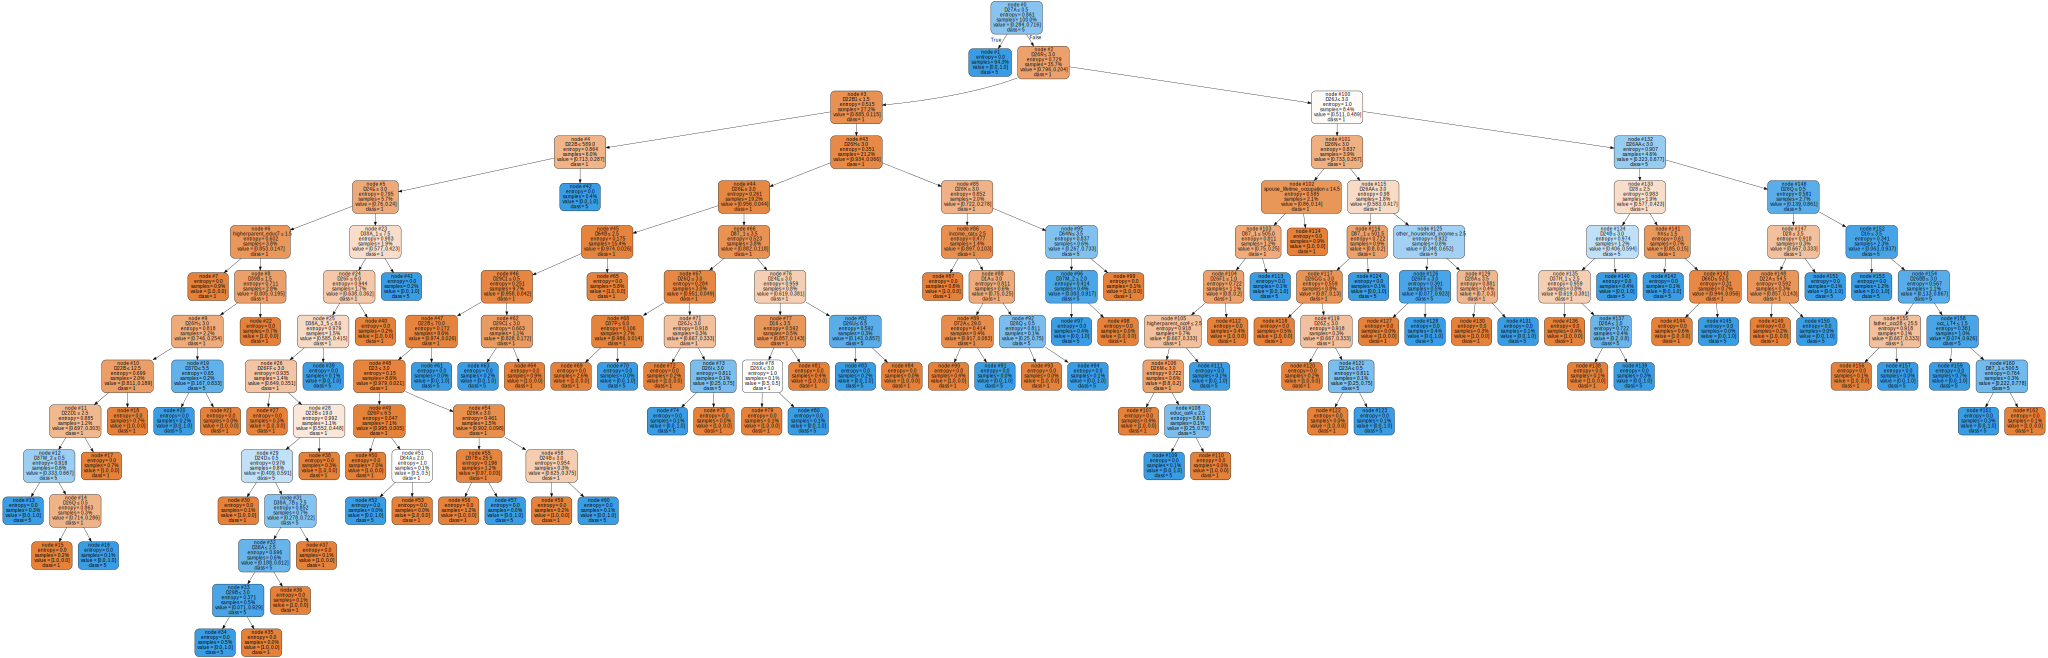

In [54]:
# Renderizando a árvore de forma gráfica:
dot_data = export_graphviz( 
         clf, 
         out_file=None,
         feature_names=data.drop(varDiagnostico,axis=1).columns,
         class_names=['1','5'],  
         filled=True, 
         rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

In [55]:
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png(nomeArq + '_Tree.png')

True

In [56]:
data.shape

(3390, 181)

# TESTE - Comentado

In [57]:
#Verificar se está jogando todos atributos na lista (Revisar)
#Move todos elementos que foram selecionados para uma lista
listSelecionados =[]
for i in range(conjSelecaoAtrib.shape[0]):
    #print(conjSelecaoAtrib.at[i,'AtributoSelecionado']);
    listSelecionados.append(conjSelecaoAtrib.at[i,'AtributoSelecionado'])

In [58]:
#Percorre a lista com os elementos selecionados e os remove da base de dados
for elemento in listSelecionados:
    data3.drop(elemento, inplace=True, axis=1)

In [59]:
data3.shape

(3390, 134)

In [60]:
#Após remover os elementos selecionados pela árvore anteriormente, nos resta os elementos que realmente queremos remover.
#Dessa forma, colocamos eles em uma nova lista, e depois disso eles serão removidos
colunasRemove = data3.columns

In [61]:
#Dados da base antes da remoção 
data2.shape

(3390, 194)

In [62]:
#Percorre a lista de atributos que realmente queremos remover da base de dados
for elemento in colunasRemove:
    data2.drop(elemento, inplace=True, axis=1)

In [63]:
#Base de dados resultante, com os atributos selecionados pela árvore de decisão
data2.shape

(3390, 60)

In [64]:
data2.head(10)

,D1A,D16,D22A,D22B,D22B1,D22D1,D23,D23A,D24B,D24D,...,D87_1,hhincome,hhs,spouse_earnings,mother_occ28,higherparent_educ4,higherparent_educ7,spouse_current_occupation,emp,occ_cur4
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,5.0,2,5.0,NaN,NaN,NaN,NaN,1,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,2.0,4.0,4,1.0,0.0,2.0,2.0,25.0,1,1.0
2,1.0,4.0,54.0,6.0,3.0,NaN,1.0,3.0,1.0,1.0,...,2.0,5.0,5,2.0,9.0,3.0,5.0,25.0,1,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,5.0,3,2.0,12.0,3.0,5.0,13.0,1,3.0
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,4.0,1,NaN,NaN,NaN,NaN,NaN,4,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,2.0,1,NaN,0.0,4.0,6.0,NaN,3,0.0
6,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,5.0,3,3.0,NaN,NaN,NaN,NaN,1,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,8.0,5.0,3,2.0,NaN,NaN,NaN,NaN,1,NaN
8,1.0,4.0,14.0,15.0,4.0,NaN,1.0,1.0,1.0,1.0,...,1.0,3.0,10,NaN,10.0,4.0,7.0,NaN,1,1.0
9,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,3.0,1,NaN,0.0,1.0,1.0,NaN,5,0.0


In [65]:
# data2.dropna(thresh=2, inplace=True)

In [66]:
data2.head(10)

,D1A,D16,D22A,D22B,D22B1,D22D1,D23,D23A,D24B,D24D,...,D87_1,hhincome,hhs,spouse_earnings,mother_occ28,higherparent_educ4,higherparent_educ7,spouse_current_occupation,emp,occ_cur4
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,5.0,2,5.0,NaN,NaN,NaN,NaN,1,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,2.0,4.0,4,1.0,0.0,2.0,2.0,25.0,1,1.0
2,1.0,4.0,54.0,6.0,3.0,NaN,1.0,3.0,1.0,1.0,...,2.0,5.0,5,2.0,9.0,3.0,5.0,25.0,1,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,5.0,3,2.0,12.0,3.0,5.0,13.0,1,3.0
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,4.0,1,NaN,NaN,NaN,NaN,NaN,4,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,2.0,1,NaN,0.0,4.0,6.0,NaN,3,0.0
6,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,5.0,3,3.0,NaN,NaN,NaN,NaN,1,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,8.0,5.0,3,2.0,NaN,NaN,NaN,NaN,1,NaN
8,1.0,4.0,14.0,15.0,4.0,NaN,1.0,1.0,1.0,1.0,...,1.0,3.0,10,NaN,10.0,4.0,7.0,NaN,1,1.0
9,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,3.0,1,NaN,0.0,1.0,1.0,NaN,5,0.0


In [67]:
data2.shape

(3390, 60)

# Saída 

In [68]:
#Gera o arquivo de saída com os atributos selecionados pela árvore de decisão
data2.to_csv('../Dataset (Limpo)/'+'DT_' + nomeArq + '.csv', encoding= 'ISO-8859-1', sep= ';', index=False)

In [69]:
#Gera o arquivo de saída com os atributos selecionados pela árvore de decisão (Backup)
data2.to_csv('DT_' + nomeArq + '.csv', encoding= 'ISO-8859-1', sep= ';', index=False)